# Lenet-5 구현해보기
![Image](https://i.imgur.com/uXtqHza.png)

## 데이터 불러오기

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist=input_data.read_data_sets("MNIST_data/", reshape=False)

X_train, Y_train = mnist.train.images, mnist.train.labels
X_validation, Y_validation = mnist.validation.images, mnist.validation.labels
X_test, Y_test = mnist.test.images, mnist.test.labels

assert(len(X_train)==len(Y_train))
assert(len(X_validation)==len(Y_validation))
assert(len(X_test)==len(Y_test))

print("\nInput Image size : {}". format(X_train[0].shape))

print("Train Set :{} samples".format(len(X_train)))
print("Validation Set : {} samples".format(len(X_validation)))
print("Test Set : {}".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz

Input Image size : (28, 28, 1)
Train Set :55000 samples
Validation Set : 5000 samples
Test Set : 10000


입력 이미지 크기는 `28x28x1`이다.

LeNet은 `32x32xC`의 크기로 입력을 받는다.

그렇기에 위 아래 왼쪽 오른쪽의 0의 패딩을 각각 2칸씩 넣어서 32로 맞춰준다.

`np.pad`

In [3]:
import numpy as np

In [4]:
X_train = np.pad(X_train, ((0,0), (2,2), (2,2), (0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0), (2,2), (2,2), (0,0)), 'constant')
X_test = np.pad(X_test, ((0,0), (2,2), (2,2), (0,0)), 'constant')

print("After padding")
print(X_train.shape)
print(X_validation.shape)
print(X_test.shape)

After padding
(55000, 32, 32, 1)
(5000, 32, 32, 1)
(10000, 32, 32, 1)


### Data 확인해보기
`np.squeeze` 
차원이 1인 것 삭제해준다.

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

Number 1


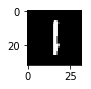

In [6]:
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image, cmap="gray")
print("Number",Y_train[index])

In [7]:
from sklearn.utils import shuffle

X_train, Y_train = shuffle(X_train, Y_train)

In [8]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

입력 : `32x32xC`

C는 Color Channel.

#### 구조
![Image](https://i.imgur.com/uXtqHza.png))
- Layer 1: Convolutional. 출력 `28x28x6` 

- Activation.

- Pooling. 출력 `14x14x6`


- Layer 2: Convolutional. 출력 `10x10x16`

- Activation.  

- Pooling. 출력 `5x5x16`

- Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.


- Layer 3: Fully Connected. 출력 `120`

- Activation. 


- Layer 4: Fully Connected. 출력 `84`

- Activation.


- Layer 5: Fully Connected (Logits). `10 outputs`

In [9]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    layer_depth = {
        'layer_1' : 6,
        'layer_2' : 16,
        'layer_3' : 120,
        'layer_f1' : 84
    }

    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape = [5,5,1,6],mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x,conv1_w, strides = [1,1,1,1], padding = 'VALID') + conv1_b 
    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_1 = tf.nn.max_pool(conv1,ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID')
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape = [5,5,6,16], mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(pool_1, conv2_w, strides = [1,1,1,1], padding = 'VALID') + conv2_b
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pool_2 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'VALID') 
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc1 = flatten(pool_2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape = (400,120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc1,fc1_w) + fc1_b
    
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape = (120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_w = tf.Variable(tf.truncated_normal(shape = (84,10), mean = mu , stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_w) + fc3_b
    return logits

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

In [11]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### 성능 평가

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, Y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], Y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x:batch_x, y:batch_y})
        total_accuracy += (accuracy*len(batch_x))
    return total_accuracy / num_examples

### 학습

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, Y_train = shuffle(X_train, Y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], Y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, Y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'saved/18-07-13')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.975

EPOCH 2 ...
Validation Accuracy = 0.983

EPOCH 3 ...
Validation Accuracy = 0.987

EPOCH 4 ...
Validation Accuracy = 0.987

EPOCH 5 ...
Validation Accuracy = 0.988

EPOCH 6 ...
Validation Accuracy = 0.988

EPOCH 7 ...
Validation Accuracy = 0.989

EPOCH 8 ...
Validation Accuracy = 0.989

EPOCH 9 ...
Validation Accuracy = 0.992

EPOCH 10 ...
Validation Accuracy = 0.989

Model saved


### Test

In [14]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('C:/Users/Murra/Jupyter/LeNet/saved/18-07-13.meta')
    saver.restore(sess, tf.train.latest_checkpoint('C:/Users/Murra/Jupyter/LeNet/saved'))
    
    test_accuracy = evaluate(X_test, Y_test)
    print("Test Accuracy : {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from C:/Users/Murra/Jupyter/LeNet/saved\18-07-13
Test Accuracy : 0.989
